In [58]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd 

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import graphviz
from graphviz import Graph

import acquire
import prepare
import prepare2

from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Having extreme difficulty with my code - Using Adam's to help format for future exercises to stay update with material

### Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:



In [ ]:
titanic_data = acquire.get_titanic_data()
df = titanic_data
df.head()

In [ ]:
#pulled and updated from prepare.py - was having some issues with the string 'sex' when splitting

def clean_data(df):
    '''
    This function will clean the data etc etc...'''
    df = df.drop_duplicates()
    cols_to_drop = ['deck', 'embarked', 'class']
    df = df.drop(columns = cols_to_drop)
    df['baseline_prediction'] = 0
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], dummy_na=False, drop_first=[True,True])
    #df = pd.concat([df, dummy_df], axis = 1)
    df.embark_town = df.embark_town.fillna(value=df.embark_town.mode())
    df = pd.concat([df, dummy_df], axis = 1)
    df = df.drop(columns = ['sex', 'embark_town'])
    df.age = df.age.fillna(value=df.age.median())
    return df
df = clean_data(df)

In [ ]:
df

In [ ]:
# df.age = df.age.fillna(value=df.age.median())
# df = df.drop(columns = ['deck', 'embarked'])
# df.embark_town = df.embark_town.fillna(value=df.embark_town.mode())


In [ ]:
# Reduce obvious noise
df = df.set_index("passenger_id")
df = df.drop(columns=["class", "embarked"])

In [ ]:
# What about nulls?
df.isna().sum()

In [ ]:
# Drop deck because there are far too many nulls
df = df.drop(columns=["deck"])

In [ ]:
# Let's fill embark_town with the most common observation
df.embark_town = df.embark_town.fillna(value=df.embark_town.mode())

In [ ]:
# Let's investigate the observations with missing age
# My first thought was empty age values might indicate children
# Looks like most of these individuals were traveling alone
no_age_info = df[df.age.isna()]
no_age_info.alone.value_counts()

In [ ]:
# Time to encode the encodeable!
dummy_df = pd.get_dummies(df[['sex','embark_town']], dummy_na=False, drop_first=[True, True])

# Drop the original columns we encoded
df = df.drop(columns=["sex", "embark_town"])

# Stitch the df and the dummy_df together again
df = pd.concat([df, dummy_df], axis=1)
df.head()

In [ ]:
train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)

In [ ]:
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [ ]:
train.head()

### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [ ]:
train.survived.value_counts()

In [ ]:
#baseline is simpliest model
#runs a .mode on y_train and saves to baseline
#what is the likely prediction here? more likely someone died or survived?
#simplest model is featureless model were they on the titanic? did they die? - will be right 62% of th time
#

In [ ]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

In [ ]:
# #baseline column and setting values to 0 (aka died), most common value in survived
# train['baseline']=0

In [ ]:
# baseline_class_report = classification_report(train.survived, train.baseline, zero_division=True)
# print(baseline_class_report)

### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)


In [ ]:
train.info()

In [ ]:
# Make the model
tree1 = DecisionTreeClassifier(max_depth=1, random_state=123)

# Fit the model (on train and only train)
tree1 = tree1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree1.predict(X_train)

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.


In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))

In [ ]:
# confusion matrix - actual on left, predicted on top
pd.DataFrame(confusion_matrix(y_train, y_predictions))

In [ ]:
print(classification_report(y_train, y_predictions))

In [ ]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)

one depth tree is able to get it right 80% of the time - could be asking are you male or female?

-add confusion matrix - (actual on left, predicted on the top = reference to how Adam has his code lined)
code18 isn't necessary just depends on how you like to visualize 

### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.


In [ ]:
# If not-survived is our positive case
TP = 265
FP = 58
FN = 42
TN = 133
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

### 5. Run through steps 2-4 using a different max_depth value.


In [ ]:
#the difference is the overfitting of the model

#how do we make the judgement call on which model works best? - no hard and fast anwser 
#focus on the difference number (<.10) could offer us models that aren't overfitting

In [ ]:
# Let's 
for i in range(2, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

#### 6. Which model performs better on your in-sample data?


In [ ]:
# Max depth of 15+ produces the highest accuracy

#### 7. Which model performs best on your out-of-sample data, the validate set?


In [ ]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(2, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

In [ ]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

# Random Forest
Continue working in your model file with titanic data to do the following:

#### - 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from pydataset import data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import graphviz
from graphviz import Graph

import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

In [ ]:
# Acquire Step
df = acquire.get_titanic_data()
df.head(2)

In [ ]:
# Reduce obvious noise
df = df.set_index("passenger_id")
df = df.drop(columns=["class", "embarked"])

In [ ]:
# Drop deck because there are far too many nulls
df = df.drop(columns=["deck"])

In [ ]:
# Let's fill embark_town with the most common observation
df.embark_town = df.embark_town.fillna(value=df.embark_town.mode())

In [ ]:
# Let's investigate the observations with missing age
# My first thought was empty age values might indicate children
# Looks like most of these individuals were traveling alone
no_age_info = df[df.age.isna()]
no_age_info.alone.value_counts()

In [ ]:
# Let's see how similar this group is to the population
for column in df.drop(columns=["age", "fare"]).columns:
    print(column)
    print("Population:")
    print(df[column].value_counts(normalize=True))
    print("No age")
    print(no_age_info[column].value_counts(normalize=True))
    print()
    print()

In [ ]:
# Time to encode the encodeable!
dummy_df = pd.get_dummies(df[['sex','embark_town']], dummy_na=False, drop_first=[True, True])

# Drop the original columns we encoded
df = df.drop(columns=["sex", "embark_town"])

# Stitch the df and the dummy_df together again
df = pd.concat([df, dummy_df], axis=1)
df.head()

In [ ]:
# Time to split!
train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)

X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [ ]:
# # Time to encode the encodeable!
# dummy_df = pd.get_dummies(df[['sex','embark_town']], dummy_na=False, drop_first=[True, True])

# # Drop the original columns we encoded
# df = df.drop(columns=["sex", "embark_town", 'embarked'])

# # Stitch the df and the dummy_df together again
# df = pd.concat([df, dummy_df], axis=1)
# df.head()

In [ ]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=123, 
                                            stratify=df.survived)
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=123,
                                       stratify=train_validate[survived])
    return train, validate, test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)

In [ ]:
train.head()

In [ ]:
from sklearn.model_selection import train_test_split


# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [ ]:
rf = RandomForestClassifier(min_samples_leaf = 1, max_depth=10, 
                            random_state=123)
rf

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
#make prediction


#### - 2. Evaluate your results using the model score, confusion matrix, and classification report.


#### - 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.


#### - 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.


#### - 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

#### After making a few models, which one has the best performance (or closest metrics) on both train and validate?

# KNN Exercises
#### Continue working in your model file with the titanic dataset.

-how do you balance a high K and elimnating outliers?
-is there any sort of guideline of ratio for K to datapoints?

-KNN seems like it won't be ideal for precision rather reccomendation?

If K gets too big you don't have a model anymore, becomes just a baseline guess
If K is too small, your model is at the wim of wherever what is nearby will dominate the classification


In [20]:
titanic_data = acquire.get_titanic_data()
df = titanic_data
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [21]:
def clean_data(df):
    '''
    This function will clean the data etc etc...'''
    df = df.drop_duplicates()
    cols_to_drop = ['deck', 'embarked', 'class']
    df = df.drop(columns = cols_to_drop)
    df['baseline_prediction'] = 0
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], dummy_na=False, drop_first=[True,True])
    #df = pd.concat([df, dummy_df], axis = 1)
    df.embark_town = df.embark_town.fillna(value=df.embark_town.mode())
    df = pd.concat([df, dummy_df], axis = 1)
    df = df.drop(columns = ['sex', 'embark_town'])
    df.age = df.age.fillna(value=df.age.median())
    return df
df = clean_data(df)

In [22]:
train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)

In [23]:
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [24]:
train.shape, validate.shape, test.shape

((498, 12), (214, 12), (179, 12))

In [41]:
train.head()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone,baseline_prediction,sex_male,embark_town_Queenstown,embark_town_Southampton
583,583,0,1,36.0,0,0,40.1250,1,0,1,0,0
165,165,1,3,9.0,0,2,20.5250,0,0,1,0,1
50,50,0,3,7.0,4,1,39.6875,0,0,1,0,1
259,259,1,2,50.0,0,1,26.0000,0,0,0,0,1
306,306,1,1,28.0,0,0,110.8833,1,0,0,0,0


In [40]:
train.isnull().sum()

passenger_id               0
survived                   0
pclass                     0
age                        0
sibsp                      0
parch                      0
fare                       0
alone                      0
baseline_prediction        0
sex_male                   0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [26]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [27]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
y_pred = knn.predict(X_train)

In [29]:
y_pred[0:10]

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0])

### 2. Evaluate your results using the model score, confusion matrix, and classification report.



In [30]:
n_neighbors = 5
weights = 'uniform'
knn1 = KNeighborsClassifier(n_neighbors, weights)
knn1.fit(X_train, y_train)

y_pred = knn1.predict(X_train)
y_pred_proba = knn1.predict_proba(X_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn1.score(X_train, y_train)))
print(confusion_matrix(y_train, y_pred))
print('------------------------------------')
print(f'n_neighbor = {n_neighbors} & weights = {weights}')
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

Accuracy of KNN classifier on training set: 0.75
[[266  41]
 [ 85 106]]
------------------------------------
n_neighbor = 5 & weights = uniform


,0,1,accuracy,macro avg,weighted avg
precision,0.757835,0.721088,0.746988,0.739462,0.743741
recall,0.866450,0.554974,0.746988,0.710712,0.746988
f1-score,0.808511,0.627219,0.746988,0.717865,0.738979
support,307.000000,191.000000,0.746988,498.000000,498.000000


In [ ]:
y_pred_proba = knn.predict_proba(X_train)

In [ ]:
y_pred_proba[0:10]

In [31]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.75


In [ ]:
print(confusion_matrix(y_train, y_pred))

In [ ]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))


### 3.Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [ ]:
cnf_matrix = confusion_matrix(y_train,y_pred)

In [ ]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [ ]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
print(f'The True Negative Rate is {TNR[0]}')
print(f'The True Positive Rate is {TPR[0]}')
print(f'The False Negative Rate is {FNR[0]}')
print(f'The False Positive Rate is {FPR[0]}')


### 4.Run through steps 2-4 setting k to 10



In [32]:
n_neighbors = 10
weights = 'uniform'
knn2 = KNeighborsClassifier(n_neighbors, weights)
knn2.fit(X_train, y_train)
y_pred = knn2.predict(X_train)
y_pred_proba = knn2.predict_proba(X_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn2.score(X_train, y_train)))
print(confusion_matrix(y_train, y_pred))
print('------------------------------------')
print(f'n_neighbor = {n_neighbors} & weights = {weights}')
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

Accuracy of KNN classifier on training set: 0.69
[[282  25]
 [127  64]]
------------------------------------
n_neighbor = 10 & weights = uniform


,0,1,accuracy,macro avg,weighted avg
precision,0.689487,0.719101,0.694779,0.704294,0.700845
recall,0.918567,0.335079,0.694779,0.626823,0.694779
f1-score,0.787709,0.457143,0.694779,0.622426,0.660926
support,307.000000,191.000000,0.694779,498.000000,498.000000


### 5.Run through setps 2-4 setting k to 20



In [33]:
n_neighbors = 20
weights = 'uniform'
knn3 = KNeighborsClassifier(n_neighbors, weights)
knn3.fit(X_train, y_train)
y_pred = knn3.predict(X_train)
y_pred_proba = knn3.predict_proba(X_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn3.score(X_train, y_train)))
print(confusion_matrix(y_train, y_pred))
print('------------------------------------')
print(f'n_neighbor = {n_neighbors} & weights = {weights}')
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

Accuracy of KNN classifier on training set: 0.67
[[290  17]
 [145  46]]
------------------------------------
n_neighbor = 20 & weights = uniform


,0,1,accuracy,macro avg,weighted avg
precision,0.666667,0.730159,0.674699,0.698413,0.691018
recall,0.944625,0.240838,0.674699,0.592732,0.674699
f1-score,0.781671,0.362205,0.674699,0.571938,0.620791
support,307.000000,191.000000,0.674699,498.000000,498.000000


### 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



- Through data discovery found that uniform preforms better than distance for weights
- That a lower n_neighbor preformed better 5 compared to 10&20 (overfitting?)

### 7. Which model performs best on our out-of-sample data from validate?

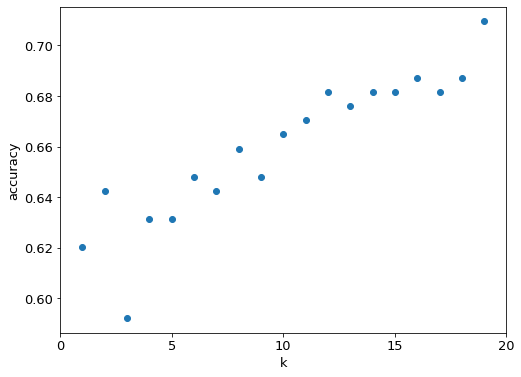

In [36]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

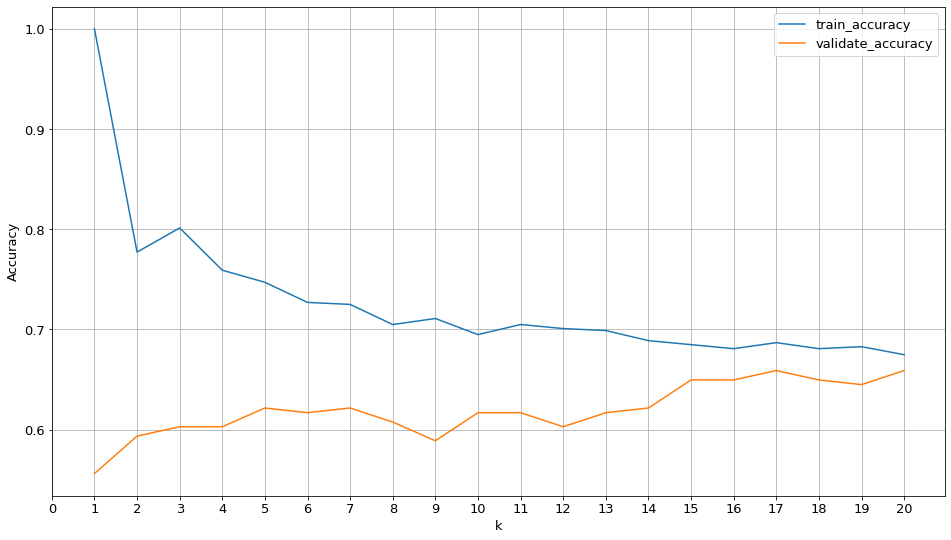

In [42]:
metrics = []

# loop through different values of k
for k in range(1, 21):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

Our performance gap is absolutely massive at first
From 12-20 the performance is relatively is similar

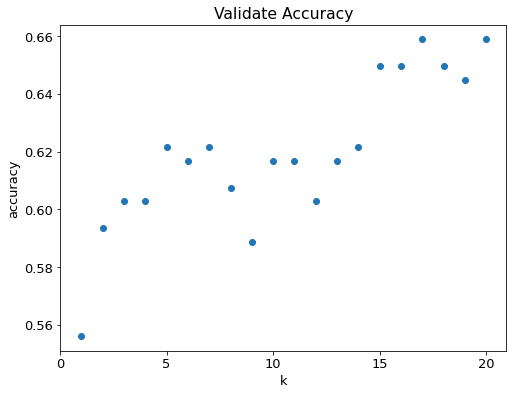

AttributeError: 'DataFrame' object has no attribute 'train_accuracy'

In [43]:
#Mason's code:

k_range = range(1, 21)
scores = []
metrics = []
for k in k_range:
    titan_knn = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
    titan_knn.fit(X_train, y_train)
    scores.append(titan_knn.score(X_validate, y_validate))
    in_sample_accuracy = titan_knn.score(X_train, y_train)
    out_of_sample_accuracy = titan_knn.score(X_validate, y_validate)
    output = {
        "n_neighbors": k,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0, 5, 10, 15, 20])
plt.title('Validate Accuracy')
plt.show();
metrics_df = pd.DataFrame(metrics)
metrics_df["difference"] = df.train_accuracy - df.validate_accuracy
metrics_df

## Logistic Regression Exercises
In these exercises, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

For all of the models you create, choose a threshold that optimizes for accuracy.

Do your work for these exercises in either a notebook or a python script named model within your classification-exercises repository. Add, commit, and push your work.


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [59]:
titanic_data = acquire.get_titanic_data()
df = titanic_data
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [60]:
def clean_data(df):
    '''
    This function will clean the data etc etc...'''
    df = df.drop_duplicates()
    cols_to_drop = ['deck', 'embarked', 'class']
    df = df.drop(columns = cols_to_drop)
    df['baseline_prediction'] = 0
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], dummy_na=False, drop_first=[True,True])
    #df = pd.concat([df, dummy_df], axis = 1)
    df.embark_town = df.embark_town.fillna(value=df.embark_town.mode())
    df = pd.concat([df, dummy_df], axis = 1)
    df = df.drop(columns = ['sex', 'embark_town'])
    df.age = df.age.fillna(value=df.age.median())
    return df
df = clean_data(df)

In [61]:
df.head()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone,baseline_prediction,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,3,1,1,35.0,1,0,53.1000,0,0,0,0,1
4,4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [62]:
df.isna().sum()

passenger_id               0
survived                   0
pclass                     0
age                        0
sibsp                      0
parch                      0
fare                       0
alone                      0
baseline_prediction        0
sex_male                   0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

In [64]:
train, validate, test = prepare2.titanic_split(df)


In [66]:
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [67]:
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

### 1. Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

In [93]:
#setting hyperparameters and fitting the model

logit = LogisticRegression(C=1, random_state=123)
#logit.fit(X_train, y_train) - need to add the featrues

In [94]:
#setting features
features = ['age', 'fare', 'pclass']

In [95]:
logit.fit(X_train[features], y_train)

LogisticRegression(C=1, random_state=123)

In [96]:
y_pred = logit.predict(X_train[features])

In [97]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,

In [98]:
logit.classes_

array([0, 1])

In [99]:
y_pred_proba

array([[0.65, 0.35],
       [0.55, 0.45],
       [0.75, 0.25],
       [0.65, 0.35],
       [0.35, 0.65],
       [0.55, 0.45],
       [0.55, 0.45],
       [0.65, 0.35],
       [0.65, 0.35],
       [0.55, 0.45],
       [0.65, 0.35],
       [0.65, 0.35],
       [0.55, 0.45],
       [0.65, 0.35],
       [0.8 , 0.2 ],
       [0.7 , 0.3 ],
       [0.8 , 0.2 ],
       [0.6 , 0.4 ],
       [0.65, 0.35],
       [0.8 , 0.2 ],
       [0.45, 0.55],
       [0.75, 0.25],
       [0.35, 0.65],
       [0.65, 0.35],
       [0.7 , 0.3 ],
       [0.75, 0.25],
       [0.5 , 0.5 ],
       [0.7 , 0.3 ],
       [0.7 , 0.3 ],
       [0.8 , 0.2 ],
       [0.75, 0.25],
       [0.6 , 0.4 ],
       [0.55, 0.45],
       [0.35, 0.65],
       [0.7 , 0.3 ],
       [0.8 , 0.2 ],
       [0.75, 0.25],
       [0.75, 0.25],
       [0.7 , 0.3 ],
       [0.45, 0.55],
       [0.7 , 0.3 ],
       [0.55, 0.45],
       [0.65, 0.35],
       [0.65, 0.35],
       [0.5 , 0.5 ],
       [0.8 , 0.2 ],
       [0.75, 0.25],
       [0.8 ,

In [105]:
#need baseline 
baseline= 1 - (train.survived).mean()
baseline = round(baseline,3)
baseline

0.616

In [107]:
print(classification_report(y_train, y_pred))
print('-------------------------------------------')
print('Accuracy of Logistic Regression Classifier on training set: {:.2f}'
     .format(logit.score(X_train[features], y_train)))
print(f'Baseline Score is {baseline}')

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       307
           1       0.67      0.43      0.53       191

    accuracy                           0.70       498
   macro avg       0.69      0.65      0.66       498
weighted avg       0.70      0.70      0.69       498

-------------------------------------------
Accuracy of Logistic Regression Classifier on training set: 0.70
Baseline Score is 0.616


### 2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.


In [109]:
features2 = ['age', 'fare', 'pclass', 'sex_male']
logit = LogisticRegression(C=1, random_state=123)

logit.fit(X_train[features2], y_train)
y_pred = logit.predict(X_train[features2])

print(classification_report(y_train, y_pred))

print(classification_report(y_train, y_pred))
print('-------------------------------------------')
print('Accuracy of Logistic Regression Classifier on training set: {:.2f}'
     .format(logit.score(X_train[features2], y_train)))
print(f'Baseline Score is {baseline}')

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       307
           1       0.76      0.73      0.74       191

    accuracy                           0.81       498
   macro avg       0.80      0.79      0.79       498
weighted avg       0.81      0.81      0.81       498

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       307
           1       0.76      0.73      0.74       191

    accuracy                           0.81       498
   macro avg       0.80      0.79      0.79       498
weighted avg       0.81      0.81      0.81       498

-------------------------------------------
Accuracy of Logistic Regression Classifier on training set: 0.81
Baseline Score is 0.616


In [ ]:
#recall = sensitivity

#messing with C changes your slope

### 3. Try out other combinations of features and models.


In [ ]:
#considered making a function - try later 

In [110]:
#solely based on age which is our baseline - wanting to see spread

features3 = ['age']
logit = LogisticRegression(C=1, random_state=123)

logit.fit(X_train[features3], y_train)
y_pred = logit.predict(X_train[features3])

print(classification_report(yA_train, y_pred))

print(classification_report(y_train, y_pred))
print('-------------------------------------------')
print('Accuracy of Logistic Regression Classifier on training set: {:.2f}'
     .format(logit.score(X_train[features3], y_train)))
print(f'Baseline Score is {baseline}')

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       307
           1       0.00      0.00      0.00       191

    accuracy                           0.62       498
   macro avg       0.31      0.50      0.38       498
weighted avg       0.38      0.62      0.47       498

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       307
           1       0.00      0.00      0.00       191

    accuracy                           0.62       498
   macro avg       0.31      0.50      0.38       498
weighted avg       0.38      0.62      0.47       498

-------------------------------------------
Accuracy of Logistic Regression Classifier on training set: 0.62
Baseline Score is 0.616


In [111]:
#No specific features within X_train


logit = LogisticRegression(C=1, random_state=123)

logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)

print(classification_report(y_train, y_pred))

print(classification_report(y_train, y_pred))
print('-------------------------------------------')
print('Accuracy of Logistic Regression Classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))
print(f'Baseline Score is {baseline}')

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       307
           1       0.79      0.68      0.73       191

    accuracy                           0.81       498
   macro avg       0.80      0.78      0.79       498
weighted avg       0.80      0.81      0.80       498

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       307
           1       0.79      0.68      0.73       191

    accuracy                           0.81       498
   macro avg       0.80      0.78      0.79       498
weighted avg       0.80      0.81      0.80       498

-------------------------------------------
Accuracy of Logistic Regression Classifier on training set: 0.81
Baseline Score is 0.616


In [119]:
#Same as above w/ C=.999

logit = LogisticRegression(C=.999, random_state=123)

logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)

print(classification_report(y_train, y_pred))

print(classification_report(y_train, y_pred))
print('-------------------------------------------')
print('Accuracy of Logistic Regression Classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))
print(f'Baseline Score is {baseline}')

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       307
           1       0.75      0.69      0.72       191

    accuracy                           0.79       498
   macro avg       0.78      0.77      0.78       498
weighted avg       0.79      0.79      0.79       498

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       307
           1       0.75      0.69      0.72       191

    accuracy                           0.79       498
   macro avg       0.78      0.77      0.78       498
weighted avg       0.79      0.79      0.79       498

-------------------------------------------
Accuracy of Logistic Regression Classifier on training set: 0.79
Baseline Score is 0.616


In [120]:
#Same as above w/ C=.001

logit = LogisticRegression(C=0.001, random_state=123)

logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)

print(classification_report(y_train, y_pred))

print(classification_report(y_train, y_pred))
print('-------------------------------------------')
print('Accuracy of Logistic Regression Classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))
print(f'Baseline Score is {baseline}')

              precision    recall  f1-score   support

           0       0.65      0.95      0.77       307
           1       0.68      0.18      0.28       191

    accuracy                           0.65       498
   macro avg       0.66      0.56      0.53       498
weighted avg       0.66      0.65      0.58       498

              precision    recall  f1-score   support

           0       0.65      0.95      0.77       307
           1       0.68      0.18      0.28       191

    accuracy                           0.65       498
   macro avg       0.66      0.56      0.53       498
weighted avg       0.66      0.65      0.58       498

-------------------------------------------
Accuracy of Logistic Regression Classifier on training set: 0.65
Baseline Score is 0.616


In [122]:
#solely based on age which is our baseline - wanting to see spread

features4 = ['age','sex_male','alone']
logit = LogisticRegression(C=1, random_state=123)

logit.fit(X_train[features4], y_train)
y_pred = logit.predict(X_train[features4])

print(classification_report(y_train, y_pred))

print(classification_report(y_train, y_pred))
print('-------------------------------------------')
print('Accuracy of Logistic Regression Classifier on training set: {:.2f}'
     .format(logit.score(X_train[features4], y_train)))
print(f'Baseline Score is {baseline}')

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       307
           1       0.76      0.70      0.73       191

    accuracy                           0.80       498
   macro avg       0.79      0.78      0.78       498
weighted avg       0.80      0.80      0.80       498

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       307
           1       0.76      0.70      0.73       191

    accuracy                           0.80       498
   macro avg       0.79      0.78      0.78       498
weighted avg       0.80      0.80      0.80       498

-------------------------------------------
Accuracy of Logistic Regression Classifier on training set: 0.80
Baseline Score is 0.616


### 4. Use you best 3 models to predict and evaluate on your validate sample.


### 5. Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?